<a href="https://colab.research.google.com/github/AndySAnker/Exp2SimGAN/blob/main/Exp2SimGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exp2SimGAN
**Github:** https://github.com/AndySAnker/Exp2SimGAN

**Paper:** Using generative adversarial networks to match experimental and simulated inelastic neutron scattering data

**Questions:** andy@chem.ku.dk

Welcome to Exp2SimGAN that is an machine learning model to translate between experimental- and simulated data. We especially use it on scattering-, spectroscopy-, and imaging data within materials chemistry..

This script guides you through a simple example of how to use Exp2SimGAN to match simulated- and experimental inelastic neutron scattering (INS) data.


# First install requirements for Exp2SimGAN (this step takes 10 - 20 minutes)

In [ ]:
%%capture
#!git clone https://github.com/AndySAnker/Exp2SimGAN
!wget https://sid.erda.dk/share_redirect/evXHKjYjlo
!unzip evXHKjYjlo
!pip install pytorch_lightning torch-geometric==1.7.2 torch-scatter
!pip3 install torch-sparse -f https://data.pyg.org/whl/torch-1.10.1+cpu.html
!pip install matplotlib==3.5.3 ipywidgets dominate
from google.colab import output, files
from IPython.display import Image
import matplotlib.pyplot as plt
import shutil
import os
import matplotlib.image as mpimg
import numpy as np

def norm_im(im):    return 0.000000001+(im - im.min())/(im.max() - im.min()) # Normalisation
def rgb2gray(rgb):  return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])
os.chdir("Exp2SimGAN")


# Predict with Exp2SimGAN

dataroot = path to data we want to predict on

name     = name of loaded model

epoch    = epoch of loaded model 

model    = model to use

results_dir = path to the results folder


In [ ]:
# Use Exp2SimGAN on the INS data
!python test.py  --dataroot test_Data --name dataset_All_balanced --results_dir results/test_Data --epoch 400 --model acdcl --input_nc 1 --output_nc 1


----------------- Options ---------------
                 DCL_mode: DCL                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: test_Data                     	[default: placeholder]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
               easy_label: experiment_name               
                    epoch: 400                           	[default: latest]
                     eval: False                         
        flip_equivariance: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: xavier                        
                 input_nc: 1                   

# Let us visualize some of the results

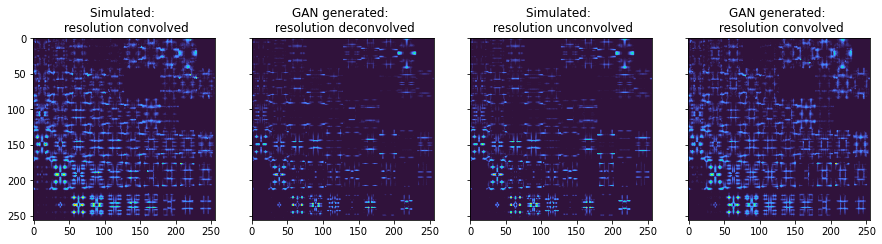

In [ ]:
# We first load the results
img_realA = mpimg.imread('results/test_Data/dataset_All_balanced/test_400/images/real_A/sim_ref_dimer_TobyFit.png')
img_realB = mpimg.imread('results/test_Data/dataset_All_balanced/test_400/images/real_B/sim_ref_dimer_Nore.png')
img_fakeA = mpimg.imread('results/test_Data/dataset_All_balanced/test_400/images/fake_A/sim_ref_dimer_Nore.png')
img_fakeB = mpimg.imread('results/test_Data/dataset_All_balanced/test_400/images/fake_B/sim_ref_dimer_TobyFit.png')

# We normalise the results and convert them to greyscale
img_realA = norm_im(rgb2gray(norm_im(img_realA)))
img_realB = norm_im(rgb2gray(norm_im(img_realB)))
img_fakeA = norm_im(rgb2gray(norm_im(img_fakeA)))
img_fakeB = norm_im(rgb2gray(norm_im(img_fakeB)))

# We visualize the results
fig, ax = plt.subplots(1, 4, sharex='col', sharey='row', figsize=(15,10))
ax[0].imshow(img_realA, cmap="turbo");
ax[0].set_title("Simulated: \n resolution convolved");
ax[1].imshow(img_fakeB, cmap="turbo");
ax[1].set_title("GAN generated: \n resolution deconvolved");
ax[2].imshow(img_realB, cmap="turbo");
ax[2].set_title("Simulated: \n resolution unconvolved");
ax[3].imshow(img_fakeA, cmap="turbo");
ax[3].set_title("GAN generated: \n resolution convolved");


**Evaluating the Exp2SimGAN on simulated 2D INS spectra from the test set.** The Exp2SimGAN model is used o data is split into 80 % training set and 20 % test set. After the network has trained on the training set, we apply it on the data in the test set. Here are both shown an example of performing resolution deconvolution and resolution convolution on 2D INS spectra simulated with the Dimer spin wave model. 

## Download the results


In [ ]:
# Download the results
!zip -r -q -T "results/test_Data.zip" "results/test_Data";
files.download("results/test_Data.zip");

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Cite
If you use our code or our results, please consider citing our papers. Thanks in advance!
```
@article{anker2022Exp2SimGAN,
  title={Using generative adversarial networks to match experimental and simulated inelastic neutron scattering data},
  author={Andy S. Anker, Keith T. Butler, Manh D. Le, Toby G. Perring, Jeyan Thiyagalingam},
  year={2022}}
```

# LICENSE
This project is licensed under the Apache License Version 2.0, January 2004 - see the LICENSE file at https://github.com/EmilSkaaning/DeepStruc/blob/main/LICENSE.md for details.